In [10]:
from typing import TypedDict
import os
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv

## reducers

from typing import Annotated
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [12]:
load_dotenv()

True

In [15]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [20]:
from langchain_groq import ChatGroq

llm  = ChatGroq(
    model = "qwen/qwen3-32b",
    temperature = 0.1
)

llm.invoke("What is 2 + 2?")

AIMessage(content='<think>\nOkay, so the user is asking "What is 2 + 2?" Hmm, that seems straightforward, but maybe I should think through it carefully. Let me start by recalling basic arithmetic. Addition is one of the fundamental operations in mathematics. When you add two numbers, you\'re combining their quantities. So 2 plus 2 would be combining two units with another two units.\n\nWait, maybe I should visualize it. If I have two apples and someone gives me two more apples, how many do I have in total? That would be four apples. So 2 + 2 equals 4. But is there any chance this is a trick question? Sometimes people ask this to check if someone is paying attention or to test basic knowledge. But in standard arithmetic, 2 + 2 is definitely 4. \n\nLet me double-check using another method. On a number line, starting at 2 and moving 2 units to the right would land me at 4. Alternatively, using fingers: hold up two fingers on one hand and two on the other, that\'s four fingers total. All t

In [21]:
## creating nodes and edges

def superbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [22]:
graph = StateGraph(State)

## adding nodes to the graph
graph.add_node("superbot", superbot)


## adding edges to the graph
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

## executing the graph
graph_builder = graph.compile()

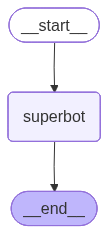

In [23]:
from IPython.display import display, Image

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [24]:
## execute using invokation

graph_builder.invoke({"messages": ["What is U238"]})

{'messages': [HumanMessage(content='What is U238', additional_kwargs={}, response_metadata={}, id='e6d9b99d-254d-4952-bdfb-ee585fbcf1e6'),
  AIMessage(content='<think>\nOkay, so I need to figure out what U238 is. Let me start by breaking down the term. The "U" probably stands for uranium, which I know is a heavy metal used in nuclear reactors and weapons. The numbers after it, 238, might refer to the atomic mass. So, uranium-238 is an isotope of uranium. \n\nWait, isotopes are variants of an element with the same number of protons but different neutrons. Uranium has several isotopes, like U-235 and U-238. I remember that U-235 is the one used in nuclear reactors because it\'s fissile, meaning it can sustain a chain reaction. But U-238 isn\'t fissile, right? Maybe it\'s fertile, which means it can be converted into fissile material through neutron capture. \n\nSo, U-238 is the most common isotope of uranium found in nature. Natural uranium is mostly U-238, with a small percentage of U-2

In [25]:
## streaming the response


graph_builder.stream({"messages": ["What is U238"]})

<generator object Pregel.stream at 0x000001F6B829A310>

In [27]:
for events in graph_builder.stream({"messages": ["What is U238"]}, stream_mode="values"):
    print(events)

{'messages': [HumanMessage(content='What is U238', additional_kwargs={}, response_metadata={}, id='4c2331c8-5581-42eb-acb1-a7e1c68a39d7')]}
{'messages': [HumanMessage(content='What is U238', additional_kwargs={}, response_metadata={}, id='4c2331c8-5581-42eb-acb1-a7e1c68a39d7'), AIMessage(content='<think>\nOkay, so I need to figure out what U238 is. Let me start by breaking down the term. The "U" probably stands for uranium, right? I remember that elements are often abbreviated with letters, like U for uranium. The numbers after it, 238, might refer to the atomic mass. So, uranium-238 is an isotope of uranium. Isotopes are variants of an element that have the same number of protons but different numbers of neutrons. \n\nWait, uranium has an atomic number of 92, which means each uranium atom has 92 protons. The atomic mass number is the sum of protons and neutrons. So, for uranium-238, the atomic mass is 238. That would mean the number of neutrons is 238 minus 92, which is 146 neutrons. 